# Import Dataset

In [ ]:
!pip install kaggle

In [56]:
data_directory = '.../data'

In [ ]:
!kaggle datasets download -d mexwell/steamgames -p {data_directory}

# Unzip Dataset

In [2]:
from dotenv import load_dotenv
import zipfile
import os

load_dotenv(".../.env")

zip_file_path = os.path.join(os.getenv('DATA_DIRECTORY'), "steamgames.zip")
extract_to_directory = os.getenv('DATA_DIRECTORY')

os.makedirs(extract_to_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load Dataset

In [3]:
games = pd.read_csv('../data/games.csv')

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

In [5]:
games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# Exploratory Data Analysis (EDA)

## Functions

In [38]:
def replace_outliers(df : pd.DataFrame, columns : list):
    for column in columns:
        # Calculate quantiles
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        
        # Calculate IQR
        RIQ = q3 - q1

        # Calculate lower and upper limits
        lower_limit = q1 - 1.5 * RIQ
        upper_limit = q3 + 1.5 * RIQ
        
        # Replace outliers
        np.where(
            df[column] < lower_limit,
            lower_limit,
            np.where(
                df[column] > upper_limit,
                upper_limit,
                df[column]
            )
        )

## Analysis

In [6]:
# Descriptive statistics for numerical columns
games.select_dtypes(include = ["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
AppID,71716.0,1.199222e+06,598223.776787,10.0,700535.00,1176745.00,1692255.00,2379920.0
Peak CCU,71716.0,1.407612e+02,5797.005513,0.0,0.00,0.00,1.00,872138.0
Required age,71716.0,3.434938e-01,2.362128,0.0,0.00,0.00,0.00,21.0
Price,71716.0,7.223055e+00,11.072051,0.0,0.99,4.99,9.99,999.0
DLC count,71716.0,6.153857e-01,14.932853,0.0,0.00,0.00,0.00,2366.0
Metacritic score,71716.0,3.834207e+00,16.437707,0.0,0.00,0.00,0.00,97.0
User score,71716.0,4.496904e-02,1.901272,0.0,0.00,0.00,0.00,100.0
Positive,71716.0,1.114753e+03,26522.457248,0.0,1.00,9.00,59.00,5764420.0
Negative,71716.0,1.821155e+02,4975.205765,0.0,0.00,3.00,18.00,895978.0
Score rank,42.0,9.890476e+01,0.878178,97.0,98.00,99.00,100.00,100.0


In [7]:
# Descriptive statistics for categorical columns
games.select_dtypes(include = "object").describe().T

,count,unique,top,freq
Name,71715,71170,Shadow of the Tomb Raider: Definitive Edition,20
Release date,71716,4170,"Dec 1, 2022",97
Estimated owners,71716,14,0 - 20000,47372
About the game,69280,68942,Help the beautiful girls to immerse themselves...,53
Supported languages,71716,9663,['English'],37560
Full audio languages,71716,1935,[],41313
Reviews,9167,9074,“The most ambitious in the modern trilogy” 9/1...,20
Header image,71716,71612,https://cdn.akamai.steamstatic.com/steam/apps/...,20
Website,35073,28855,https://www.facebook.com/8FloorGames/,242
Support url,36250,23995,https://www.facebook.com/8FloorGames,270


In [8]:
# Check for missing values on based on percentage
null_percentage = (games.isnull().sum() / games.shape[0]) * 100 

In [9]:
# Columns with more than 45% missing values
cols_del = null_percentage[null_percentage > 45]

In [10]:
cols_del

Reviews           87.217636
Website           51.094595
Support url       49.453400
Metacritic url    94.731998
Score rank        99.941436
Notes             85.439790
dtype: float64

In [11]:
# Drop columns with more than 45% missing values
games = games.drop(columns = list(cols_del.index))

In [ ]:
games.drop(columns = ['AppID'], inplace = True)

In [12]:
games.shape

(71716, 33)

In [21]:
games.select_dtypes(include = 'number').describe().T

,count,mean,std,min,25%,50%,75%,max
Peak CCU,71716.0,140.761197,5797.005513,0.0,0.00,0.00,1.00,872138.0
Required age,71716.0,0.343494,2.362128,0.0,0.00,0.00,0.00,21.0
Price,71716.0,7.223055,11.072051,0.0,0.99,4.99,9.99,999.0
DLC count,71716.0,0.615386,14.932853,0.0,0.00,0.00,0.00,2366.0
Metacritic score,71716.0,3.834207,16.437707,0.0,0.00,0.00,0.00,97.0
User score,71716.0,0.044969,1.901272,0.0,0.00,0.00,0.00,100.0
Positive,71716.0,1114.752510,26522.457248,0.0,1.00,9.00,59.00,5764420.0
Negative,71716.0,182.115525,4975.205765,0.0,0.00,3.00,18.00,895978.0
Achievements,71716.0,21.641977,185.583590,0.0,0.00,1.00,19.00,9821.0
Recommendations,71716.0,898.118537,19476.270588,0.0,0.00,0.00,0.00,3441592.0


c:\Users\HP\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

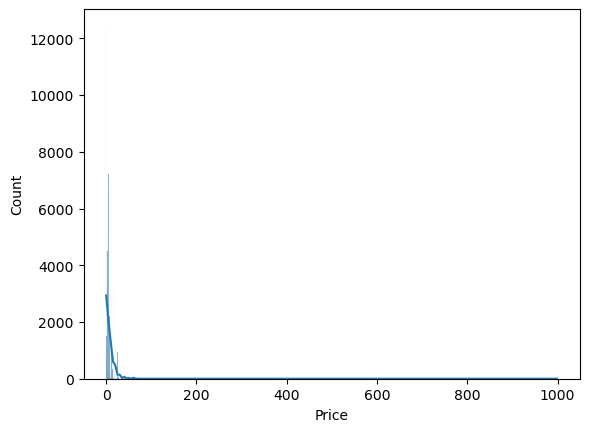

In [24]:
sns.histplot(games['Price'], kde = True)

In [25]:
q1 = games['Price'].quantile(0.25)
q3 = games['Price'].quantile(0.75)

RIQ = q3 - q1

In [29]:
upper_limit = q3 + 1.5 * RIQ
lower_limit = q1 - 1.5 * RIQ

In [36]:
games[(games['Price'] < lower_limit) | (games['Price'] > upper_limit)]['Price'].count()

3352

In [27]:
q4 = games['Price'].quantile(1)

In [26]:
RIQ

9.0